# Explorando Dados

In [1]:
## EXIBINDO MAIS COLUNAS NO HEAD e definindo tamanho das figuras do pylab

In [2]:
import pandas as pd
%matplotlib inline 
%pylab inline
pd.set_option("display.max_columns", 200)
pylab.rcParams['figure.figsize'] = 10, 5
pd.options.mode.chained_assignment = None

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd

# Path of the file to read
iowa_file_path = 'dados/Iowa House Prices/train.csv' 


# Fill in the line below to read the file into a variable home_data
home_data = iowa_file_path



## Step 2: Review The Data
Use the command you learned to view summary statistics of the data. Then fill in variables to answer the following questions

In [4]:
# baseado no describe
# What is the average lot size (rounded to nearest integer)?
avg_lot_size = 10517

# As of today, how old is the newest home (current year - the date in which it was built)
newest_home_age = 10

In [5]:
### Analisando isNA, null e não null

In [6]:
X_full = pd.read_csv('dados/Iowa House Prices/train.csv', index_col='Id')

In [7]:
# contagem de isna
print(X_full.SalePrice.isna().sum())

0


In [8]:
# contagem de isnull
print(X_full.SalePrice.isnull().sum())

0


In [9]:
#contagem de nao nulos
print(X_full.SalePrice.count())

1460


### Convertendo datetime

In [10]:
dados = pd.read_csv("../MARIO FILHO/seriestemporaisyt-master/2004-2019.tsv", sep = '\t')
# Converte data para to_datetime IMPORTANTISSIMO FAZER ISTO, elas abriram como STRINGS
dados['DATA INICIAL'] = pd.to_datetime(dados['DATA INICIAL'])
dados['DATA FINAL'] = pd.to_datetime(dados['DATA FINAL'])

### Filtrando os dados para pegar somente oleo diesel (ex de series temporais)

In [11]:
#copia do dataframe dados para um chamado diesel, pegando só as linhas de oleo diesel
diesel = dados[dados['PRODUTO'] == 'ÓLEO DIESEL'].copy()

### Pegando somente uma coluna

In [12]:
#define diesel treino e valid
diesel_treino = diesel[diesel['DATA FINAL'] < "2011-01-01"]
diesel_valid = diesel[diesel['DATA FINAL'] >= "2011-01-01"]
diesel_treino.shape, diesel_valid.shape
#define o y para cada dataset, em ambos são o mesmo campo
y_treino = diesel_treino['PREÇO MÉDIO REVENDA']
y_valid = diesel_valid['PREÇO MÉDIO REVENDA']
#print (y_treino)

### Filtrando por períodos de datas

In [13]:
diesel_treino = diesel[diesel['DATA FINAL'] < "2011-01-01"]
diesel_valid = diesel[diesel['DATA FINAL'] >= "2011-01-01"]
diesel_treino.shape, diesel_valid.shape

((9233, 21), (11961, 21))

### Pegando valores da semana anterior para fazer baseline

In [14]:

baseline_treino = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].shift(1)
baseline_valid = diesel_valid.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].shift(1)
#joga no dataframe a coluna baseline calculada logo acima 
diesel_treino['baseline'] = baseline_treino

### Criando nova feature com as variações de preços

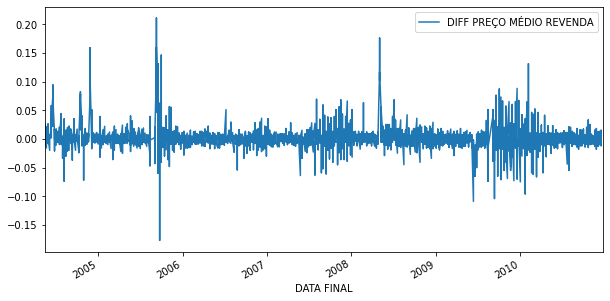

In [15]:
# simplesmente faz diferença preço de hoje e preço de ontem
# a funcao abaixo target_diff recebe uma série e faz a diferença (preço de hoje menos preço de ontem) e retorna
# como faz isto? def nomefunc(nomevar):
#    retorna a nomevar depois de fazer a difereça  com a nomevar da linha anterior, ou seja, o diff do shift: nomevar.diff().shift(-1) 
def target_diff(x):
    return x.diff().shift(-1) #valor dela mesma menos da linha anterior(-1)

# no dataframe, criamos nova coluna df[''], atribuimos a ela o seguinte, agrupamos o preço por estado df.groupby(['ESTADO'])['PRECO'] 
# com isto criamos a série que vamos passar (aplicar) a def acima

diesel_treino['DIFF PREÇO MÉDIO REVENDA'] = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].apply(target_diff)
#aqui em cima tem que fazer group by e pegar a linha que queremos (PREÇO MÉDIO REVENDA)

diesel_treino.plot(x='DATA FINAL', y='DIFF PREÇO MÉDIO REVENDA')

### Criando sazonais

In [16]:
# cria o df_X_treino
#poe um index em cada dataframe
df_X_treino = pd.DataFrame(index=diesel_treino.index)
df_X_valid = pd.DataFrame(index=diesel_valid.index)
df_X_treino['DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA'] = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].apply(target_diff)
df_X_valid['DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA'] = diesel_valid.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].apply(target_diff)


In [17]:
#df_X_treino['DIA_DA_SEMANA'] = diesel_treino['DATA FINAL'].dt.weekday
df_X_treino['DIA_DO_ANO'] = diesel_treino['DATA FINAL'].dt.dayofyear
df_X_treino['SEMANA_DO_ANO'] = diesel_treino['DATA FINAL'].dt.weekofyear


df_X_valid['MES'] = diesel_valid['DATA FINAL'].dt.month
df_X_valid['DIA'] = diesel_valid['DATA FINAL'].dt.day
#df_X_valid['DIA_DA_SEMANA'] = diesel_valid['DATA FINAL'].dt.weekday
df_X_valid['DIA_DO_ANO'] = diesel_valid['DATA FINAL'].dt.dayofyear
df_X_valid['SEMANA_DO_ANO'] = diesel_valid['DATA FINAL'].dt.weekofyear

In this exercise, you will work with data from the [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course). 

![Ames Housing dataset image](https://i.imgur.com/lTJVG4e.png)

Run the next code cell without changes to load the training and validation sets in `X_train`, `X_valid`, `y_train`, and `y_valid`.  The test set is loaded in `X_test`.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X = pd.read_csv('dados/Iowa House Prices/train.csv', index_col='Id') 
X_test = pd.read_csv('dados/Iowa House Prices/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

# To keep things simple, we'll drop columns with missing values
cols_with_missing = [col for col in X.columns if X[col].isnull().any()] 
X.drop(cols_with_missing, axis=1, inplace=True)
X_test.drop(cols_with_missing, axis=1, inplace=True)

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

Use the next code cell to print the first five rows of the data.

In [14]:
X_train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
619,20,RL,11694,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,...,108,0,0,260,0,0,7,2007,New,Partial
871,20,RL,6600,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,0,0,0,8,2009,WD,Normal
93,30,RL,13360,Pave,IR1,HLS,AllPub,Inside,Gtl,Crawfor,...,0,44,0,0,0,0,8,2009,WD,Normal
818,20,RL,13265,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,...,59,0,0,0,0,0,7,2008,WD,Normal
303,20,RL,13704,Pave,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,...,81,0,0,0,0,0,1,2006,WD,Normal


Notice that the dataset contains both numerical and categorical variables.  You'll need to encode the categorical data before training a model.

To compare different models, you'll use the same `score_dataset()` function from the tutorial.  This function reports the [mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) (MAE) from a random forest model.

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

# Step 1: Drop columns with categorical data

You'll get started with the most straightforward approach.  Use the code cell below to preprocess the data in `X_train` and `X_valid` to remove columns with categorical data.  Set the preprocessed DataFrames to `drop_X_train` and `drop_X_valid`, respectively.  

In [17]:
# Fill in the lines below: drop columns in training and validation data
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])



In [18]:
# Lines below will give you a hint or solution code
#step_1.hint()
#step_1.solution()

Run the next code cell to get the MAE for this approach.

In [19]:
print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop categorical variables):
17837.82570776256


# Step 2: Label encoding

Before jumping into label encoding, we'll investigate the dataset.  Specifically, we'll look at the `'Condition2'` column.  The code cell below prints the unique entries in both the training and validation sets.

In [20]:
print("Unique values in 'Condition2' column in training data:", X_train['Condition2'].unique())
print("\nUnique values in 'Condition2' column in validation data:", X_valid['Condition2'].unique())

Unique values in 'Condition2' column in training data: ['Norm' 'PosA' 'Feedr' 'PosN' 'Artery' 'RRAe']

Unique values in 'Condition2' column in validation data: ['Norm' 'RRAn' 'RRNn' 'Artery' 'Feedr' 'PosN']


If you now write code to: 
- fit a label encoder to the training data, and then 
- use it to transform both the training and validation data, 

you'll get an error.  Can you see why this is the case?  (_You'll need  to use the above output to answer this question._)

In [21]:
#step_2.a.hint()

In [22]:
# Check your answer (Run this code cell to receive credit!)
step_2.a.solution()

NameError: name 'step_2' is not defined

This is a common problem that you'll encounter with real-world data, and there are many approaches to fixing this issue.  For instance, you can write a custom label encoder to deal with new categories.  The simplest approach, however, is to drop the problematic categorical columns.  

Run the code cell below to save the problematic columns to a Python list `bad_label_cols`.  Likewise, columns that can be safely label encoded are stored in `good_label_cols`.

In [ ]:
# All categorical columns
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columns that can be safely label encoded
good_label_cols = [col for col in object_cols if 
                   set(X_train[col]) == set(X_valid[col])]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
        
print('Categorical columns that will be label encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Use the next code cell to label encode the data in `X_train` and `X_valid`.  Set the preprocessed DataFrames to `label_X_train` and `label_X_valid`, respectively.  
- We have provided code below to drop the categorical columns in `bad_label_cols` from the dataset. 
- You should label encode the categorical columns in `good_label_cols`.  

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Drop categorical columns that will not be encoded
label_X_train = X_train.drop(bad_label_cols, axis=1)
label_X_valid = X_valid.drop(bad_label_cols, axis=1)

# Apply label encoder 
label_encoder = LabelEncoder()
for col in set(good_label_cols):
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])
    
# Check your answer
step_2.b.check()

In [ ]:
# Lines below will give you a hint or solution code
step_2.b.hint()
step_2.b.solution()

Run the next code cell to get the MAE for this approach.

In [ ]:
print("MAE from Approach 2 (Label Encoding):") 
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))

# Step 3: Investigating cardinality

So far, you've tried two different approaches to dealing with categorical variables.  And, you've seen that encoding categorical data yields better results than removing columns from the dataset.

Soon, you'll try one-hot encoding.  Before then, there's one additional topic we need to cover.  Begin by running the next code cell without changes.  

In [27]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X_train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('Street', 2),
 ('Utilities', 2),
 ('CentralAir', 2),
 ('LandSlope', 3),
 ('PavedDrive', 3),
 ('LotShape', 4),
 ('LandContour', 4),
 ('ExterQual', 4),
 ('KitchenQual', 4),
 ('MSZoning', 5),
 ('LotConfig', 5),
 ('BldgType', 5),
 ('ExterCond', 5),
 ('HeatingQC', 5),
 ('Condition2', 6),
 ('RoofStyle', 6),
 ('Foundation', 6),
 ('Heating', 6),
 ('Functional', 6),
 ('SaleCondition', 6),
 ('RoofMatl', 7),
 ('HouseStyle', 8),
 ('Condition1', 9),
 ('SaleType', 9),
 ('Exterior1st', 15),
 ('Exterior2nd', 16),
 ('Neighborhood', 25)]

The output above shows, for each column with categorical data, the number of unique values in the column.  For instance, the `'Street'` column in the training data has two unique values: `'Grvl'` and `'Pave'`, corresponding to a gravel road and a paved road, respectively.

We refer to the number of unique entries of a categorical variable as the **cardinality** of that categorical variable.  For instance, the `'Street'` variable has cardinality 2.

Use the output above to answer the questions below.

In [28]:
# Fill in the line below: How many categorical variables in the training data
# have cardinality greater than 10?
high_cardinality_numcols = 3

# Fill in the line below: How many columns are needed to one-hot encode the 
# 'Neighborhood' variable in the training data?
num_cols_neighborhood = 25

# Check your answers
#step_3.a.check()

In [29]:
# Lines below will give you a hint or solution code
#step_3.a.hint()
#step_3.a.solution()

For large datasets with many rows, one-hot encoding can greatly expand the size of the dataset.  For this reason, we typically will only one-hot encode columns with relatively low cardinality.  Then, high cardinality columns can either be dropped from the dataset, or we can use label encoding.

As an example, consider a dataset with 10,000 rows, and containing one categorical column with 100 unique entries.  
- If this column is replaced with the corresponding one-hot encoding, how many entries are added to the dataset?  
- If we instead replace the column with the label encoding, how many entries are added?  

Use your answers to fill in the lines below.

In [30]:
# Fill in the line below: How many entries are added to the dataset by 
# replacing the column with a one-hot encoding?
OH_entries_added = 1e4*100 - 1e4

# Fill in the line below: How many entries are added to the dataset by
# replacing the column with a label encoding?
label_entries_added = 0

# Check your answers
step_3.b.check()

NameError: name 'step_3' is not defined

In [ ]:
# Lines below will give you a hint or solution code
#step_3.b.hint()
#step_3.b.solution()

# Step 4: One-hot encoding

In this step, you'll experiment with one-hot encoding.  But, instead of encoding all of the categorical variables in the dataset, you'll only create a one-hot encoding for columns with cardinality less than 10.

Run the code cell below without changes to set `low_cardinality_cols` to a Python list containing the columns that will be one-hot encoded.  Likewise, `high_cardinality_cols` contains a list of categorical columns that will be dropped from the dataset.

In [ ]:
# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

Use the next code cell to one-hot encode the data in `X_train` and `X_valid`.  Set the preprocessed DataFrames to `OH_X_train` and `OH_X_valid`, respectively.  
- The full list of categorical columns in the dataset can be found in the Python list `object_cols`.
- You should only one-hot encode the categorical columns in `low_cardinality_cols`.  All other categorical columns should be dropped from the dataset. 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#
#
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

# Check your answer
step_4.check()

In [ ]:
# Lines below will give you a hint or solution code
#step_4.hint()
#step_4.solution()

Run the next code cell to get the MAE for this approach.

In [ ]:
print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

# Step 5: Generate test predictions and submit your results

After you complete Step 4, if you'd like to use what you've learned to submit your results to the leaderboard, you'll need to preprocess the test data before generating predictions.

**This step is completely optional, and you do not need to submit results to the leaderboard to successfully complete the exercise.**

Check out the previous exercise if you need help with remembering how to [join the competition](https://www.kaggle.com/c/home-data-for-ml-course) or save your results to CSV.  Once you have generated a file with your results, follow the instructions below:
1. Begin by clicking on the blue **Save Version** button in the top right corner of the window.  This will generate a pop-up window.  
2. Ensure that the **Save and Run All** option is selected, and then click on the blue **Save** button.
3. This generates a window in the bottom left corner of the notebook.  After it has finished running, click on the number to the right of the **Save Version** button.  This pulls up a list of versions on the right of the screen.  Click on the ellipsis **(...)** to the right of the most recent version, and select **Open in Viewer**.  This brings you into view mode of the same page. You will need to scroll down to get back to these instructions.
4. Click on the **Output** tab on the right of the screen.  Then, click on the blue **Submit** button to submit your results to the leaderboard.

You have now successfully submitted to the competition!

If you want to keep working to improve your performance, select the blue **Edit** button in the top right of the screen. Then you can change your code and repeat the process. There's a lot of room to improve, and you will climb up the leaderboard as you work.


In [36]:
# (Optional) Your code here




# Keep going

With missing value handling and categorical encoding, your modeling process is getting complex. This complexity gets worse when you want to save your model to use in the future. The key to managing this complexity is something called **pipelines**. 

**[Learn to use pipelines](https://www.kaggle.com/alexisbcook/pipelines)** to preprocess datasets with categorical variables, missing values and any other messiness your data throws at you.

# SHIFT

In [37]:
import numpy as np
import pandas as pd
 

# Example 1: Shift values (by row)
df1 = pd.DataFrame({'Col1': np.arange(10, 60, 10),
                   'Col2': np.arange(11, 61, 10),
                   'Col3': np.arange(12, 62, 10)})
 
 
print(df1.shift(periods=-2).fillna(0).astype(int))

   Col1  Col2  Col3
0    30    31    32
1    40    41    42
2    50    51    52
3     0     0     0
4     0     0     0


In [38]:
# Example 2: shift index
ind = pd.date_range('01 / 01 / 2019', periods=5, freq='12H')

In [39]:
df2 = pd.DataFrame({"A": [1, 2, 3, 4, 5],
                   "B": [10, 20, np.nan, 40, 50],
                   "C": [11, 22, 33, np.nan, 55],
                   "D": [-11, -24, -51, -36, -2],
                   'D1': [False] * 5,
                   'E': [True, False, False, True, True]},
                  index=ind)

In [40]:
print(df2.shift(freq='2H', periods=3)) 

                     A     B     C   D     D1      E
2019-01-01 06:00:00  1  10.0  11.0 -11  False   True
2019-01-01 18:00:00  2  20.0  22.0 -24  False  False
2019-01-02 06:00:00  3   NaN  33.0 -51  False  False
2019-01-02 18:00:00  4  40.0   NaN -36  False   True
2019-01-03 06:00:00  5  50.0  55.0  -2  False   True


In [41]:

# Example 3: Shift values (by column)
print(df2.astype(object).shift(periods=1, axis=1).infer_objects())

                      A  B     C     D  D1      E
2019-01-01 00:00:00 NaN  1  10.0  11.0 -11  False
2019-01-01 12:00:00 NaN  2  20.0  22.0 -24  False
2019-01-02 00:00:00 NaN  3   NaN  33.0 -51  False
2019-01-02 12:00:00 NaN  4  40.0   NaN -36  False
2019-01-03 00:00:00 NaN  5  50.0  55.0  -2  False


# Cardinalidade

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Importa os dois CSVs, teste e treino
X_full = pd.read_csv('Dados/Housing Prices Competition for Kaggle Learn Users/train.csv', index_col='Id')
X_test_full = pd.read_csv('Dados/Housing Prices Competition for Kaggle Learn Users/test.csv', index_col='Id')

In [43]:
# contagem de isnull
print(X_full.SalePrice.isnull().sum())

0


In [44]:

#contagem de nao nulos
print(X_full.SalePrice.count())

1460


In [45]:

# contagem de isna
print(X_full.SalePrice.isna().sum())


0


In [46]:
# Remove linhas com a variável alvo faltando, separa alvo e preditores
# neste caso nao tinha salesprice nulo então não dá pra ver a função agindo mas se desse os contadores acima ajudariam
# dissecando o comando df.dropna(axis=0, subset=['ColunaAlvo'], inplace=True)
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# Quebrando validação do treinamento
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

# Missing Values

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Lendo dados ( no original atribuia o index mas estava dando erro)
#X_full = pd.read_csv('../kaggle/input/train.csv', index_col='Id')
#X_test_full = pd.read_csv('../kaggle/input/test.csv', index_col='Id')
X_full = pd.read_csv('../kaggle/input/train.csv')
X_test_full = pd.read_csv('../kaggle/input/test.csv')

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# To keep things simple, we'll use only numerical predictors
X = X_full.select_dtypes(exclude=['object'])
X_test = X_test_full.select_dtypes(exclude=['object'])

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [48]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
259823,1793554,1112694,9521,132,1.0,1989,NaN
296305,2228525,896820,23931,136,NaN,1998,0.0
148817,1522036,1452830,4199,132,2.0,1989,NaN
99268,1416913,1178673,3357,132,2.0,1982,NaN
160662,1580944,1430028,8308,132,1.0,1977,NaN


### Shape e Missing Values (faltantes)

In [1]:
# Shape of training data (num_rows, num_columns)
print(X_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

NameError: name 'X_train' is not defined

# Preenchendo valores em branco

In [2]:
df.fillna(-1, inplace=True)

NameError: name 'df' is not defined

### Numero de linhas total, numero de colunas com missing, número total de missing

Use the above output to answer the questions below.

In [55]:
# Fill in the line below: How many rows are in the training data?
num_rows = 1168

# Fill in the line below: How many columns in the training data
# have missing values?
num_cols_with_missing = 3

# Fill in the line below: How many missing entries are contained in 
# all of the training data?
tot_missing = 276


### Cria um score para depois Imputar ou dropar os Missing Values e ver como afeta o Score
Considering your answers above, what do you think is likely the best approach to dealing with the missing values?

In [ ]:
#step_1.b.hint()
#Como há relativamente poucas entradas faltantes nos dados
# a coluna com maior percentual de valores faltantes
# tem menos de 20% faltantes, neste caso,  dropar colunas provavelmente não dá bons resultados
# pois estaríamos jogando fora um monte de daos valiosos
# Neste caso IMPUTAR VALORES funciona melhor.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

### Step 2: Drop columns with missing values
In this step, you'll preprocess the data in X_train and X_valid to remove columns with missing values. Set the preprocessed DataFrames to reduced_X_train and reduced_X_valid, respectively.

In [56]:
# Fill in the line below: get names of columns with missing values
# Your code here
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Fill in the lines below: drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)



In [57]:
print("MAE (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE (Drop columns with missing values):
7026.521957494546


### Step 3: Imputation
Part A
Use the next code cell to impute missing values with the mean value along each column. Set the preprocessed DataFrames to imputed_X_train and imputed_X_valid. Make sure that the column names match those in X_train and X_valid.




[28]





In [58]:
from sklearn.impute import SimpleImputer

# Fill in the lines below: imputation
# Your code here
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Fill in the lines below: imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns


Run the next code cell without changes to obtain the MAE for this approach.

In [59]:
print("MAE (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE (Imputation):
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

Traceback (most recent call last):
  File "/Users/gustavorodriguessilveira/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-59-c3091894c920>", line 2, in <module>
    print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))
  File "<ipython-input-15-2698d73d4825>", line 7, in score_dataset
    model.fit(X_train, y_train)
  File "/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 1007, in __call__
    while self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/loca

KeyboardInterrupt: 

In [ ]:
### Part B

Compare the MAE from each approach.  Does anything surprise you about the results?  Why do you think one approach performed better than the other?

### Step 4: Generate test predictions

In this final step, you'll use any approach of your choosing to deal with missing values.  Once you've preprocessed the training and validation features, you'll train and evaluate a random forest model.  Then, you'll preprocess the test data before generating predictions that can be submitted to the competition!

### Part A

Use the next code cell to preprocess the training and validation data.  Set the preprocessed DataFrames to `final_X_train` and `final_X_valid`.  **You can use any approach of your choosing here!**  in order for this step to be marked as correct, you need only ensure:
- the preprocessed DataFrames have the same number of columns,
- the preprocessed DataFrames have no missing values, 
- `final_X_train` and `y_train` have the same number of rows, and
- `final_X_valid` and `y_valid` have the same number of rows.

In [ ]:
# Preprocessed training and validation features
final_imputer = SimpleImputer(strategy='median')
final_X_train = pd.DataFrame(final_imputer.fit_transform(X_train))
final_X_valid = pd.DataFrame(final_imputer.transform(X_valid))

# Imputation removed column names; put them back
final_X_train.columns = X_train.columns
final_X_valid.columns = X_valid.columns



### Run the next code cell to train and evaluate a random forest model. (Note that we don't use the score_dataset() function above, because we will soon use the trained model to generate test predictions!)

In [ ]:
# Define and fit model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(final_X_train, y_train)

# Get validation predictions and MAE
preds_valid = model.predict(final_X_valid)
print("MAE (Your approach):")
print(mean_absolute_error(y_valid, preds_valid))

### Part B

Use the next code cell to preprocess your test data.  Make sure that you use a method that agrees with how you preprocessed the training and validation data, and set the preprocessed test features to `final_X_test`.

Then, use the preprocessed test features and the trained model to generate test predictions in `preds_test`.

In order for this step to be marked correct, you need only ensure:
- the preprocessed test DataFrame has no missing values, and
- `final_X_test` has the same number of rows as `X_test`.

In [ ]:
# Fill in the line below: preprocess test data
final_X_test = pd.DataFrame(final_imputer.transform(X_test))

# Fill in the line below: get test predictions
preds_test = model.predict(final_X_test)



In [ ]:
Run the next code cell without changes to save your results to a CSV file that can be submitted directly to the competition.

In [ ]:
# Save test predictions to file
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)



In [ ]:
Step 5: Submit your results
Once you have successfully completed Step 4, you're ready to submit your results to the leaderboard! (You also learned how to do this in the previous exercise. If you need a reminder of how to do this, please use the instructions below.)

First, you'll need to join the competition if you haven't already. So open a new window by clicking on this link. Then click on the Join Competition button.
Next, follow the instructions below: 1. Begin by clicking on the blue Save Version button in the top right corner of the window. This will generate a pop-up window.
2. Ensure that the Save and Run All option is selected, and then click on the blue Save button. 3. This generates a window in the bottom left corner of the notebook. After it has finished running, click on the number to the right of the Save Version button. This pulls up a list of versions on the right of the screen. Click on the ellipsis (...) to the right of the most recent version, and select Open in Viewer. This brings you into view mode of the same page. You will need to scroll down to get back to these instructions. 4. Click on the Output tab on the right of the screen. Then, click on the blue Submit button to submit your results to the leaderboard.

You have now successfully submitted to the competition!

If you want to keep working to improve your performance, select the blue Edit button in the top right of the screen. Then you can change your code and repeat the process. There's a lot of room to improve, and you will climb up the leaderboard as you work.
